<a href="https://colab.research.google.com/github/JorgeHernandezRivera/datathon_2023/blob/main/Reto_Datathon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datatón de Análisis de Recursos Humanos (HR Analytics)**

## **Introducción y Antecedentes de la Problemática a Resolver**
En un mundo empresarial cada vez más dinámico y competitivo,
la gestión efectiva del talento se ha convertido en un factor de-
terminante para el éxito de las organizaciones. En este contexto,
nos embarcamos en la misión de descubrir insights significativos y
desarrollar modelos predictivos que no solo optimicen la gestión de
talento, sino que también impacten positivamente en la satisfacción
laboral, fomenten la diversidad y impulsen la eficiencia operativa. A
través de nuestro enfoque innovador, buscamos ofrecer soluciones
que no solo se adapten a las necesidades cambiantes del mercado,
sino que también impulsen el crecimiento sostenible de las orga-
nizaciones, permitiéndoles alcanzar su máximo potencial. En este
camino hacia la excelencia empresarial, nos comprometemos a
proporcionar herramientas analíticas avanzadas y perspicaces que
guíen a las organizaciones hacia un futuro donde la gestión del
talento se convierte en una ventaja estratégica innegable.

## **Objetivo**
 Descubrir insights significativos y desarrollar modelos predictivos que ayuden a mejorar la gestión de talento, la satisfacción laboral, la diversidad y la eficiencia operativa en las organizaciones.

## **Análisis Exploratorio**

## Carga de Datos

* Importando las librerías necesarias y obtenemos el dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('https://github.com/JorgeHernandezRivera/datathon_2023/raw/main/data/bosch_aic_datathon.xlsx')

* Obtenemos una vista previa y rápida de los datos para entender la estructura y el contenido del DataFrame, utilizando la función .head()

In [3]:
df.head()

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,NaN,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


## Explicacion de Datos

* Utilizamos la función .info() para obtener una vision general de la estructura e integridad de los datos




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Posición                                      1403 non-null   object        
 1   Area                                          1403 non-null   object        
 2   Á.liq.                                        1403 non-null   object        
 3   Grupo de personal                             1403 non-null   object        
 4   CODIGO POSTAL                                 1403 non-null   int64         
 5   Motivo de la RENUNCIA                         1403 non-null   object        
 6   Banda                                         1402 non-null   object        
 7   Baja                                          1403 non-null   datetime64[ns]
 8   ReglaPHT                                      1403 non-null   object

| Número | Nombre de la Columna                           | Tipo de Dato   | Descripción                                                                                   |
|--------|-------------------------------------------------|----------------|-----------------------------------------------------------------------------------------------|
| 0      | Posición                                        | object         | El cargo o posición laboral del empleado.                                                    |
| 1      | Área                                            | object         | El área o departamento al que pertenece el empleado.                                         |
| 2      | Á.liq.                                          | object         | Posiblemente relacionado con la liquidación salarial.                                        |
| 3      | Grupo de personal                               | object         | Grupo al que pertenece el empleado dentro de la organización.                                |
| 4      | CODIGO POSTAL                                   | int64          | Código postal de la ubicación del empleado.                                                  |
| 5      | Motivo de la RENUNCIA                           | object         | El motivo o razón por la cual un empleado renunció.                                          |
| 6      | Banda                                           | object         | Banda salarial a la que pertenece el empleado.                                               |
| 7      | Baja                                            | datetime64[ns] | Fecha de baja del empleado.                                                                    |
| 8      | ReglaPHT                                        | object         | Posiblemente una regla o política relacionada con el empleo.                                  |
| 9      | Alta                                            | datetime64[ns] | Fecha de alta del empleado.                                                                    |
| 10     | Años                                            | int64          | Número de años de experiencia laboral del empleado.                                           |
| 11     | Meses                                           | float64        | Número de meses de experiencia laboral adicional a los años.                                  |
| 12     | Antigüedad                                      | int64          | Antigüedad total del empleado en la organización.                                             |
| 13     | Clave de sexo                                   | object         | Clave o identificación del género del empleado.                                               |
| 14     | Lugar de nacimiento                             | object         | Lugar de nacimiento del empleado.                                                             |
| 15     | Nacionalidad                                    | object         | Nacionalidad del empleado.                                                                    |
| 16     | Edad del empleado                               | int64          | Edad del empleado en años.                                                                    |
| 17     | ¿Cuanto tiempo tiene viviendo en Cd. Juarez?    | object         | Tiempo que el empleado ha vivido en Ciudad Juárez.                                           |
| 18     | Estado Civil                                    | object         | Estado civil del empleado.                                                                    |
| 19     | Hijos                                           | int64          | Número de hijos que tiene el empleado.

## Limpieza de Datos

### Cambio de nombres columnas

* Renombramos las columnas, para un mejor manejo de los datos.

In [5]:
# Crear un diccionario con los nuevos nombres de las columnas
nuevos_nombres = {
    'Á.liq.': 'Liquidación',
    'Grupo de personal': 'Grupo',
    'Código_Postal': 'Codigo_Postal',
    'Motivo de la RENUNCIA': 'Motivo_Renuncia',
    'Banda': 'Nivel_Salarial',
    'Baja': 'Fecha_Baja',
    'ReglaPHT': 'Regla_PHT',
    'Alta': 'Fecha_Alta',
    'Clave de sexo': 'Genero',
    'Lugar de nacimiento': 'Lugar_Nacimiento',
    'Nacionalidad': 'Nacionalidad',
    'Edad del empleado': 'Edad',
    '¿Cuanto tiempo tiene viviendo en Cd. Juarez?': 'Tiempo_CDJuarez',
    'Estado Civil': 'Estado_Civil',
    'Hijos': 'Numero_Hijos'
}

# Usar el método rename para cambiar los nombres de las columnas
df.rename(columns=nuevos_nombres, inplace=True)

* Verificamos que las columnas fueron renombras correctamente.

In [6]:
df.head()

,Posición,Area,Liquidación,Grupo,CODIGO POSTAL,Motivo_Renuncia,Nivel_Salarial,Fecha_Baja,Regla_PHT,Fecha_Alta,Años,Meses,Antigüedad,Genero,Lugar_Nacimiento,Nacionalidad,Edad,Tiempo_CDJuarez,Estado_Civil,Numero_Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,NaN,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Posición          1403 non-null   object        
 1   Area              1403 non-null   object        
 2   Liquidación       1403 non-null   object        
 3   Grupo             1403 non-null   object        
 4   CODIGO POSTAL     1403 non-null   int64         
 5   Motivo_Renuncia   1403 non-null   object        
 6   Nivel_Salarial    1402 non-null   object        
 7   Fecha_Baja        1403 non-null   datetime64[ns]
 8   Regla_PHT         1403 non-null   object        
 9   Fecha_Alta        1403 non-null   datetime64[ns]
 10  Años              1403 non-null   int64         
 11  Meses             1403 non-null   float64       
 12  Antigüedad        1403 non-null   int64         
 13  Genero            1403 non-null   object        
 14  Lugar_Nacimiento  1401 n

Como resultado de la exploración de los datos, se obtuvoel siguiente resultado.

Las columnas que no necesitan limpieza son:

- Posicion
- Area
- Liquidacion
- Grupo
- Codigo Postal
- Motivo Renuncia
- Fecha Baja
- Regla PHT
- Fecha Alta
- Años
- Meses
- Antigüedad
- Genero
- Nacionalidad
- Edad
- Numero_Hijos

Por el contrario las columnas que necesitan limpieza son:
- Lugar Nacimiento
- Nivel_Salarial
- Tiempo_CDJuarez
- Estado_Civil

### Limpieza por columna

#### Nivel Salarial

* Filtramos las filas  en la columna 'Nivel_Salarial', para ver cuantos registros tienen un valor nulo (NaN).

In [8]:
df[df['Nivel_Salarial'].isnull()]

,Posición,Area,Liquidación,Grupo,CODIGO POSTAL,Motivo_Renuncia,Nivel_Salarial,Fecha_Baja,Regla_PHT,Fecha_Alta,Años,Meses,Antigüedad,Genero,Lugar_Nacimiento,Nacionalidad,Edad,Tiempo_CDJuarez,Estado_Civil,Numero_Hijos
454,POS1921,MFS,S5,Direct,32575,Vol-Transferencia entre planta,NaN,2023-08-04,JF010600,2022-12-29,1,7.266667,218,Femenino,CIUDAD JUAREZ,Mexican,20,NaN,solter,0


* Asignamos valores aleatoriamente a las celdas nulas en la columna 'Nivel_Salarial' con una probabilidad proporcional a la frecuencia de esos valores en las celdas no nulas existentes.

In [9]:
# Imputar valores nulos basados en la distribución existente
probs_salario = df['Nivel_Salarial'].value_counts(normalize=True)
df['Nivel_Salarial'].fillna(np.random.choice(probs_salario.index, p=probs_salario.values), inplace=True)


#### Lugar de Nacimiento

* Obtenemos los valores de la columna Lugar de Nacimiento.

In [10]:
print(df['Lugar_Nacimiento'].value_counts())

JUAREZ                 434
CHIHUAHUA              200
VERACRUZ                97
CIUDAD JUAREZ           70
DURANGO                 54
                      ... 
MEXICO D.F               1
VENUSTIANO CARRANZA      1
SANTA ROSA               1
MECAYAPAN                1
S.F. DEL ORO, CHIH.      1
Name: Lugar_Nacimiento, Length: 237, dtype: int64


**Se  puede notar que hay repeticiones:**
- JUAREZ, CIUDAD JUAREZ, CD. JUAREZ, CD JUAREZ, CD. JUAREZ, CHIH;        
- CD JUAREZ CHIH;                 
- CD. JUAREZ, CHIH.

Limpiamos y agrupamos los lugares de nacimiento, para facilitar el análisis y evitar problemas de duplicados debido a variaciones en la escritura o capitalización

In [11]:
# Limpiar y agrupar los lugares de nacimiento
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].str.upper()  # Convertir a mayúsculas para evitar duplicados por diferencias de capitalización
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'CD. JUAREZ': 'CIUDAD JUAREZ', 'CD JUAREZ': 'CIUDAD JUAREZ', 'CD. JUAREZ, CHIH': 'CIUDAD JUAREZ', 'CD. JUAREZ, CHIH.': 'CIUDAD JUAREZ', 'CD. JUAREZ, CHIHUAHUA': 'CIUDAD JUAREZ', 'JUAREZ': 'CIUDAD JUAREZ', 'CD. JUAREZ CHIHUAHUA': 'CIUDAD JUAREZ', 'CIUDAD JUAREZ, CHIH': 'CIUDAD JUAREZ', 'JUAREZ, CHIHUAHUA':'CIUDAD JUAREZ','CD.JUAREZ':'CIUDAD JUAREZ','CD JUAREZ CHIH':'CIUDAD JUAREZ','CD. JUAREZ CHIH.':'CIUDAD JUAREZ', 'CD. JUAREZ CHIH':'CIUDAD JUAREZ', 'CD.JUAREZ,CHIH':'CIUDAD JUAREZ','AZTECA CIUDAD JUAREZ': 'CIUDAD JUAREZ'})  # Agrupar nombres similares
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'DF':'CDMX','MEXICO D.F.':'CDMX','MEXICO DF':'CDMX','DISTRITO FEDERAL':'CDMX', 'MEXICO D.F': 'CDMX', 'MEXICO': 'CDMX', 'CUAUTITLAN IZCALLI':'CDMX' })  # Agrupar nombres similares
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'TUXTEPEC':'OAXACA', 'SAN JUAN BAUTISTA TUXTEPE': 'OAXACA', 'LOMA BONITA, OAXACA': 'OAXACA', 'OAXACA DE JUAREZ':'OAXACA','JUCHITAN':'OAXACA', 'SAN ANDRES OAX':'OAXACA', 'TUXTEPEC OAXACA':'OAXACA', 'SAN LUCAS OJITLAN':'OAXACA' })  # Agrupar nombres similares
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'CUAUHTEMOC':'CHIHUAHUA','JIMENEZ':'CHIHUAHUA','CAMARGO':'CHIHUAHUA','SANTA BARBARA':'CHIHUAHUA','PARRAL, CHIH':'CHIHUAHUA','DELICIAS':'CHIHUAHUA', 'CHIHUAHUA CHIH.': 'CHIHUAHUA', 'CUAUHTEMOC, CHIH': 'CHIHUAHUA', 'NUEVO CASAS GRANDES, CHIH':'CHIHUAHUA', 'GPE. VICTORIA CHIH.': 'CHIHUAHUA', 'NAICA, CHIHUAHUA': 'CHIHUAHUA', 'HIDALGO DEL PARRAL, CHIH.':'CHIHUAHUA', 'GOMEZ FARIAS, CHIHUAHU': 'CHIHUAHUA', 'CD. DELICIAS CHIH.': 'CHIHUAHUA', 'S.F. DEL ORO, CHIH.':'CHIHUAHUA', 'DELICIAS CHIHUAHUA':'CHIHUAHUA', 'ALLENDE, CHIH.':'CHIHUAHUA', 'GOMEZ FARIAS CHIHUAHUA': 'CHIHUAHUA','BALLEZA, CHIHUAHUA':'CHIHUAHUA', 'BALLEZA':'CHIHUAHUA', 'CHIHUAHUA CHI.':'CHIHUAHUA', 'HGO DEL PARRAL CHIH':'CHIHUAHUA', 'HIDALGO DEL PARRAL':'CHIHUAHUA', 'HIDALGO DE PARRAL':'CHIHUAHUA'})  # Agrupar nombres similares
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'ANGEL R CABADA':'VERACRUZ','SAN ANDRES TUXTLA':'VERACRUZ','OTEAPAN':'VERACRUZ','TRES VALLES': 'VERACRUZ','COSAMALOPAPAN':'VERACRUZ','CORDOVA VER':'VERACRUZ','ACAYUCAN':'VERACRUZ','COSAMALOAPAN':'VERACRUZ', 'MINATITLAN': 'VERACRUZ', 'CORDOBA': 'VERACRUZ', 'COATZACOALCOS':'VERACRUZ', 'COSOLEACAQUE': 'VERACRUZ', 'COSAMALOAPAN DE CARPIO': 'VERACRUZ', 'ORIZABA':'VERACRUZ'})  # Agrupar nombres similares
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'CD GOMEZ PALACIO':'DURANGO','CD. GOMEZ PALACIO':'DURANGO','GOMEZ PALACIO':'DURANGO'})  # Agrupar nombres similares
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'FRESNILLO':'ZACATECAS', 'LAS PILAS ZAC.':'ZACATECAS'})
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'COAHILA':'COAHUILA','E. NVO. MUNDO, COAHUILA':'COAHUILA','RAMOS ARIZPE ':'COAHUILA','FRANCISCO I MADERO':'COAHUILA','TORREON, COAHUILA':'COAHUILA','MATAMOROS COAH.':'COAHUILA','TORREON':'COAHUILA', 'COAHUILA DE ZARAGOZA':'COAHUILA'})
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'MONTERREY':'NUEVO LEON', 'SAN PEDRO':'NUEVO LEON'})
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'TOLUCA MEXICO':'ESTADO DE MEXICO','TOLUCA':'ESTADO DE MEXICO'})
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'VILLAHERMOSA':'TABASCO', 'HUIMANGUILLO':'TABASCO'})
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'GUADALAJARA':'JALISCO'})
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'ACAPULCO':'GUERRERO'})
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'CULIACAN':'SINALOA', 'LOS MOCHIS': 'SINALOA'})
df['Lugar_Nacimiento'] = df['Lugar_Nacimiento'].replace({'ARRIAGA':'CHIAPAS','OCOSINGO':'CHIAPAS','TUXTLA GUTIERREZ':'CHIAPAS'})



print("\nDespués de la agrupación:")
#print(df['Lugar_Nacimiento'].value_counts())
print(df['Lugar_Nacimiento'].value_counts().to_string())


Después de la agrupación:
CIUDAD JUAREZ                581
CHIHUAHUA                    239
VERACRUZ                     133
OAXACA                        69
DURANGO                       65
COAHUILA                      62
ZACATECAS                     17
CHIAPAS                       17
CDMX                          17
GUERRERO                       9
TABASCO                        8
PUEBLA                         8
SINALOA                        8
NUEVO LEON                     7
ESTADO DE MEXICO               5
JALISCO                        5
CAMPECHE                       4
TAMAULIPAS                     4
MICHOACAN                      4
IXHUATAN                       3
GUANAJUATO                     3
PENJAMO                        2
VICENTE GUERRERO               2
CARDENAS                       2
SAN LUIS POTOSI                2
HIDALGO                        2
CUERNAVACA                     2
QUERETARO                      2
LERDO                          2
TLAHUALILO DE ZA

* Asignamos valores aleatorios en las celdas nulas de la columna 'Lugar_Nacimiento' con una probabilidad proporcional a la frecuencia de esos valores en las celdas no nulas existentes.

In [12]:
# Imputar valores nulos basados en la distribución existente
probs_nacimiento= df['Lugar_Nacimiento'].value_counts(normalize=True)
df['Lugar_Nacimiento'].fillna(np.random.choice(probs_nacimiento.index, p=probs_nacimiento.values), inplace=True)

#### Tiempo en CD Juarez

* Posteriormente obtenoms la sumatoria delos valores nulos y la distribución de estos mismos en la columna 'Tiempo_CDJuarez'








In [13]:
df['Tiempo_CDJuarez'].isnull().sum()

786

In [14]:
df['Tiempo_CDJuarez'].value_counts()

10+ Years      475
3-4 Years       27
9-10 Years      20
5-6 Years       15
8-9 Years       15
6-7 Years       14
2-3 Years       13
7-8 Years       12
1-2 Years        7
25               3
10               2
21               2
19               1
16               1
61-90 Days       1
25 years         1
4                1
5                1
26 years         1
4-5 Years        1
10 years         1
91-180 Days      1
7                1
6 Years          1
Name: Tiempo_CDJuarez, dtype: int64

Definimos una función llamada 'categorizar_tiempo', en donde se realizan las siguientes categorizaciones:

* Para valores nulos (NaN), devuelve el mismo valor (x), manteniendo los nulos.

* Para valores numéricos (int o float), categoriza los años en rangos
específicos (por ejemplo, 1 año, 2 años, ..., 10+ años).

* Para valores de cadena que contienen la palabra "Years" y están en un formato específico, los categoriza en rangos de años o asigna valores específicos (por ejemplo, '10+ Years' o '5-6 Years').

* Para valores de cadena que contienen la palabra "Days", los asigna al rango '0-1 Years'.

* Para casos específicos para los valores '25 years' y '26 years', asignándolos al rango '10+ Years'.


Por ultimo aplicamos las nuevas categorias a la columna 'Tiempo_CDJuarez'

In [15]:
def categorizar_tiempo(x):
    if pd.isnull(x):
        return x  # Mantener NaN si es NaN
    elif isinstance(x, (int, float)): #Para los valores numericos
        if x <= 1:
            return f'{int(x)} Year' if x == 1 else f'{int(x)} Years'
        elif x >= 10:
            return '10+ Years'
        else:
            return f'{int(x)}-{int(x) + 1} Years'
    elif 'Years' in str(x):
        if '10+' in str(x):
            return '10+ Years'
        elif '6' in str(x):
            return '5-6 Years'
        else:
            return str(x)
    elif 'Days' in str(x):
      return '0-1 Years'  # Regresamos un valor de 0-1 years para los dias
    elif '25 years' in str(x):
      return '10+ Years'
    elif '26 years' in str(x):
      return '10+ Years'


df['Tiempo_CDJuarez'] = df['Tiempo_CDJuarez'].apply(categorizar_tiempo)

* Verificamos la distribucion de los valores en las nuevas categorias.

In [16]:
df['Tiempo_CDJuarez'].value_counts()

10+ Years     486
5-6 Years      31
3-4 Years      27
9-10 Years     20
8-9 Years      15
7-8 Years      13
2-3 Years      13
1-2 Years       7
0-1 Years       2
4-5 Years       2
Name: Tiempo_CDJuarez, dtype: int64

* Ahora obtenemos los registros que tienen un valor nulo (NaN).

In [17]:
df[df['Tiempo_CDJuarez'].isnull()]

,Posición,Area,Liquidación,Grupo,CODIGO POSTAL,Motivo_Renuncia,Nivel_Salarial,Fecha_Baja,Regla_PHT,Fecha_Alta,Años,Meses,Antigüedad,Genero,Lugar_Nacimiento,Nacionalidad,Edad,Tiempo_CDJuarez,Estado_Civil,Numero_Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,CIUDAD JUAREZ,Mexican,31,NaN,solter,0
6,POS538,VS9-ABS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JF060600,2020-01-09,3,36.333333,1090,Femenino,CIUDAD JUAREZ,Mexican,21,NaN,solter,0
14,POS1376,VS9-ABS,S5,Direct,32576,Vol-Insatisfacción personal,DNO,2023-01-03,JF010600,2019-01-24,4,48.000000,1440,Femenino,CIUDAD JUAREZ,Mexican,27,NaN,solter,0
15,POS1323,VS7,S5,Direct,32575,Vol-No regreso / no dio razón,DO,2023-01-04,JF010600,2022-08-11,1,4.866667,146,Femenino,CIUDAD JUAREZ,Mexican,33,NaN,solter,2
21,POS1323,VS1,S5,Direct,32599,Vol-Transferencia entre planta,DO,2023-01-05,JF010600,2018-09-06,5,52.733333,1582,Femenino,GUERRERO,Mexican,23,NaN,solter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,POS790,QMM,S6,Exempt,32585,Vol-Transferencia entre planta,E4,2022-12-31,ADMINIST,2011-09-12,11,137.600000,4128,Masculino,CDMX,Mexican,44,NaN,casad.,0
1399,POS2802,TEF,S5,Direct,32575,Vol-Cambio de domicilio,DNO,2022-07-26,JT012324,2015-08-05,7,84.900000,2547,Masculino,CIUDAD JUAREZ,Mexican,28,NaN,solter,0
1400,POS538,VS7,S5,Direct,32575,Vol-No regreso / no dio razón,DNO,2022-09-02,JT031800,2022-07-21,0,1.433333,43,Femenino,CHIHUAHUA,Mexican,21,NaN,solter,0
1401,POS538,VS9-ABS,S5,Direct,32600,Imp.Tra-Ausentismos continuos,DNO,2022-09-02,JT031800,2017-03-30,5,66.066667,1982,Femenino,VERACRUZ,Mexican,45,NaN,U.Libr,2


* Asignamos valores aleatorios a las celdas nulas en la columna 'Tiempo_CDJuarez' con una probabilidad proporcional a la frecuencia de esos valores en las celdas no nulas existentes.



In [18]:
#Nulos basados en la distribucion existente
probs = df['Tiempo_CDJuarez'].value_counts(normalize=True)
df['Tiempo_CDJuarez'].fillna(np.random.choice(probs.index, p=probs.values), inplace=True)

In [19]:
df['Tiempo_CDJuarez'].value_counts()

10+ Years     1273
5-6 Years       31
3-4 Years       27
9-10 Years      20
8-9 Years       15
7-8 Years       13
2-3 Years       13
1-2 Years        7
0-1 Years        2
4-5 Years        2
Name: Tiempo_CDJuarez, dtype: int64

#### Estado Civil

* Al igual que las otras columnas obtenmos la sumatoria de los valores nulos y las categorias correspondientes a Estado civil.

In [20]:
print(f"El valor de nulos es : {df['Estado_Civil'].isnull().sum()}")

print("Las categorias son:")
print(df['Estado_Civil'].value_counts())

El valor de nulos es : 10
Las categorias son:
solter    615
U.Libr    285
casad.    281
Solter    122
Casad.     54
divorc     26
viud.       5
Divorc      3
Concu.      1
Sep.        1
Name: Estado_Civil, dtype: int64


* Estandarizamos las variaciones en la escritura o capitalización, para evitar duplicidades en las categorias de Estado Civil.

In [21]:
df['Estado_Civil'] = df['Estado_Civil'].str.lower().str.strip()
print(df['Estado_Civil'].value_counts())

solter    737
casad.    335
u.libr    285
divorc     29
viud.       5
concu.      1
sep.        1
Name: Estado_Civil, dtype: int64


* Hacemos un diccionario de nuevas categorias para un mejor entendimiento y las mapeamos en la columna de Estado Civil

In [22]:
# Mapeo de categorias
mapeo_estado_civil = {
    'solter': 'Soltero',
    'u.libr': 'Unión Libre',
    'casad.': 'Casado',
    'divorc': 'Divorciado',
    'viud.': 'Viudo',
    'concu.': 'Concuvinato',
    'sep.': 'Separado'
}

df['Estado_Civil'] = df['Estado_Civil'].map(mapeo_estado_civil)

df['Estado_Civil'].fillna('Desconocido',inplace=True)

print(df['Estado_Civil'].value_counts())

Soltero        737
Casado         335
Unión Libre    285
Divorciado      29
Desconocido     10
Viudo            5
Concuvinato      1
Separado         1
Name: Estado_Civil, dtype: int64


In [23]:
df.head()

,Posición,Area,Liquidación,Grupo,CODIGO POSTAL,Motivo_Renuncia,Nivel_Salarial,Fecha_Baja,Regla_PHT,Fecha_Alta,Años,Meses,Antigüedad,Genero,Lugar_Nacimiento,Nacionalidad,Edad,Tiempo_CDJuarez,Estado_Civil,Numero_Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,CIUDAD JUAREZ,Mexican,31,10+ Years,Soltero,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,Soltero,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,CIUDAD JUAREZ,Mexican,23,10+ Years,Soltero,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,Soltero,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,CIUDAD JUAREZ,Mexican,26,10+ Years,Soltero,0


# **Categorias de Datos:**

### **Posiciones**

* POS1323    329
* POS538     205
* POS2939    124
* POS1921    109
* POS1230     82
*           ...
* POS970       1
* POS698       1
* POS2167      1
* POS2913      1
* POS2562      1

### **Areas**
* VS9-ABS       320
* MFS           286
* VS7           192
* VS5           132
* VS1           123
* LOG            97
* TEF            88
* VS4            88
* VS1-HOUS       27
* QMM            19
* HRL            10
* CTG             8
* DBE             5
* HSE             5
* Admin MSE2      2
* Admin MSE1      1

### **Liquidacion o Area Liquidacion**
* S5    1249
* S6     154

### **Grupo**
* Direct        1231
* Exempt         139
* Indirect        18
* Managers        13
* Non-Exempt       2

### **Codigo_Postal**
* 32575    526
* 32599    199
* 32590     77
* 32600     55
* 32695     43
*         ...
* 32424      1
* 32360      1
* 32687      1
* 32140      1
* 32677      1

### **Motivo_Renuncia**
* Vol-Otro empleo                     308
* Vol-Transferencia entre planta      237
* Vol-No regreso / no dio razón       218
* Vol-Prob personales y/o fam.        197
* Vol-Insatisfacción personal          94
* Vol-Cambio de domicilio              89
* Imp.Tra-Ausentismos continuos        71
* Vol-Estudios                         68
* Imp.Tra-Jubilación                   33
* Vol-Razones médicas                  28
* Imp.Tra-LFT y/o Reglamento int       12
* Imp.Tra-LFT y/o Reglamento Int.      12
* Imp.Pat-Pensionado IMSS               8
* Imp.Pat-Terminación del Contrato      6
* Imp.Tra-Bajo desempeño                3
* Muerte Natural                        3
* Vol-Maternidad                        3
* Imp.Pat-Terminación del contra        2
* Imp.Tra-Falsificación de docto        2
* Muerte Accidental                     2
* Imp.Tra-Falsificación de doctos.      2
* Vol-Matrimonio                        1
* Imp.Tra-Uso de drogas y/o bebi        1
* Vol-Problemas con transporte          1
* Vol-Ambiente de trabajo               1
* Imp.Pat-Varios Jubilado               1

### **Nivel_Salarial**
* DO     881
* DNO    362
* E3      97
* E4      49
* SL1     13


### **Regla_PHT**
* JF010600    381
* JS011500    308
* ADMINIST    205
* JT012324    174
* JT031800    168
* JF060600    111
* JF050600     34
* JT021800     22

### **Genero**
* Femenino     709
* Masculino    694

### **Nacionalidad**
* Mexican     1402
* Filipino       1

### **Numero_Hijos**
* 0    651
* 1    260
* 2    239
* 3    178
* 4     61
* 5     11
* 6      3


**Guardamos nuestros datos limpios**

In [24]:
df.to_csv('clean_data.csv',index=False)

* Obtenenmos los motivos de renuncia

In [25]:
df['Motivo_Renuncia'].value_counts()

Vol-Otro empleo                     308
Vol-Transferencia entre planta      237
Vol-No regreso / no dio razón       218
Vol-Prob personales y/o fam.        197
Vol-Insatisfacción personal          94
Vol-Cambio de domicilio              89
Imp.Tra-Ausentismos continuos        71
Vol-Estudios                         68
Imp.Tra-Jubilación                   33
Vol-Razones médicas                  28
Imp.Tra-LFT y/o Reglamento int       12
Imp.Tra-LFT y/o Reglamento Int.      12
Imp.Pat-Pensionado IMSS               8
Imp.Pat-Terminación del Contrato      6
Imp.Tra-Bajo desempeño                3
Muerte Natural                        3
Vol-Maternidad                        3
Imp.Pat-Terminación del contra        2
Imp.Tra-Falsificación de docto        2
Muerte Accidental                     2
Imp.Tra-Falsificación de doctos.      2
Vol-Matrimonio                        1
Imp.Tra-Uso de drogas y/o bebi        1
Vol-Problemas con transporte          1
Vol-Ambiente de trabajo               1


# Creacion Nuevas Caracteristicas

* Se crean nuevas caracteristicas que nos ayuden a la agrupacion y categorias en los datos, para su posterior graficación.

## Rango Edad

* Creamos una nueva columna llamada 'RangoEdad', a partir de la columna existente 'Edad'.

In [26]:
bins = [0, 18, 25, 35, 50, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51+']
df['RangoEdad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

## Mes de Baja

* Añadimos una nueva columna llamada 'Mes_Baja'. Esta columna contiene el mes de la fecha en la columna 'Fecha_Baja'.

In [27]:
df['Mes_Baja'] = df['Fecha_Baja'].dt.month

## Año de Baja


* Igualmente agrega una nueva columna llamada 'Año_Baja'. La columna 'Año_Baja' contendrá los valores correspondientes al año 'Fecha_Baja'.

In [28]:
df['Año_Baja'] = df['Fecha_Baja'].dt.year

# Visualizacion de Datos

* Importando las librerías necesarias para graficar.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Genero
**¿Cuántas mujeres y cuantos hombres hay en estos datos?**

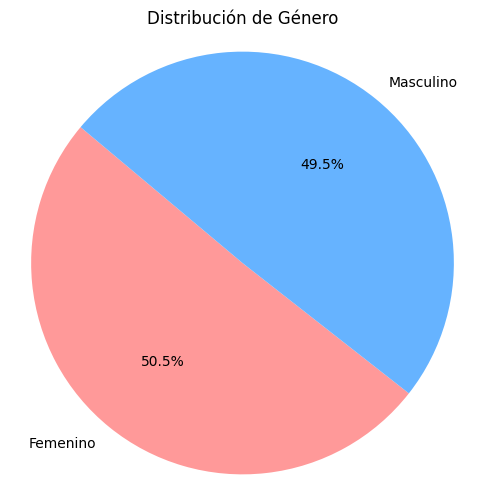

In [30]:
genero_counts = df['Genero'].value_counts()
colores = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Distribución de Género')
plt.axis('equal')
plt.show()

**La representación gráfica indica una predominancia de mujeres en la muestra, constituyendo la mayoría de la población analizada.**


## Bajas

**¿Cuántas bajas por año hay en estos datos?**

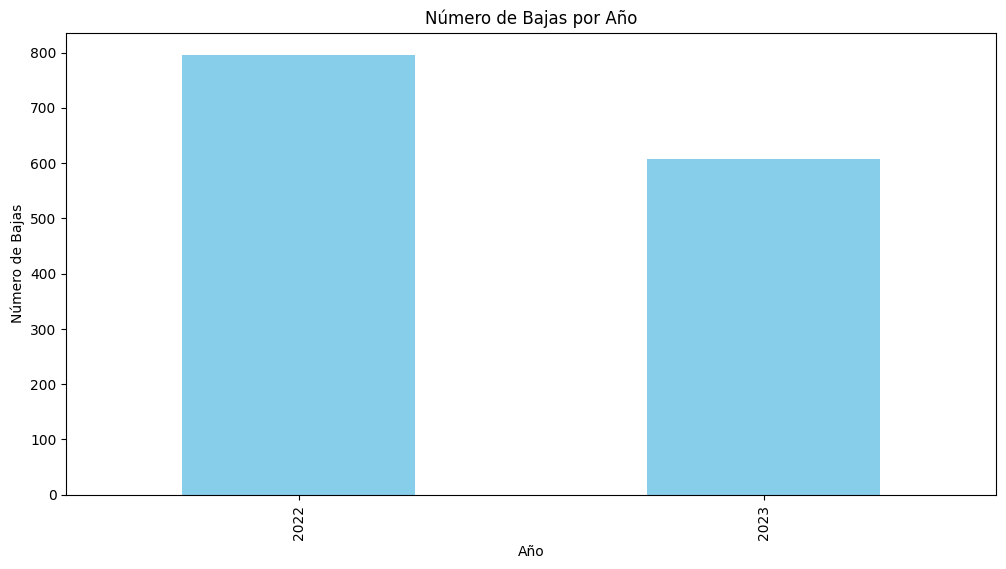

In [31]:
# Contar el número de bajas por año
serie_bajas_por_año = df['Año_Baja'].value_counts().sort_index()

# Crear la visualización
plt.figure(figsize=(12, 6))
serie_bajas_por_año.plot(kind='bar', color='skyblue')
plt.title('Número de Bajas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Bajas')
plt.show()

**La gráfica de barras evidencia un mayor número de bajas en 2022 en comparación con 2023.**




---



## Edad
**¿Cual es la distribución de edad?**

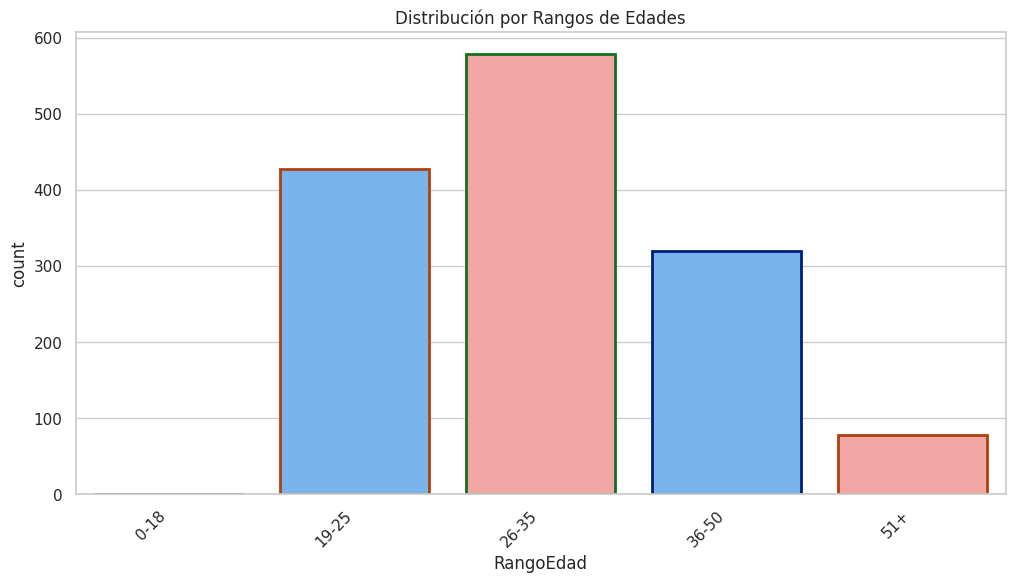

In [32]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='RangoEdad', data=df, palette=colores, order=labels, linewidth=2, edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribución por Rangos de Edades')
plt.show()

**La distribución de edades revela un predominio significativo de personas con edades comprendidas entre 26 y 35 años.**


### Edad por Mes de Baja

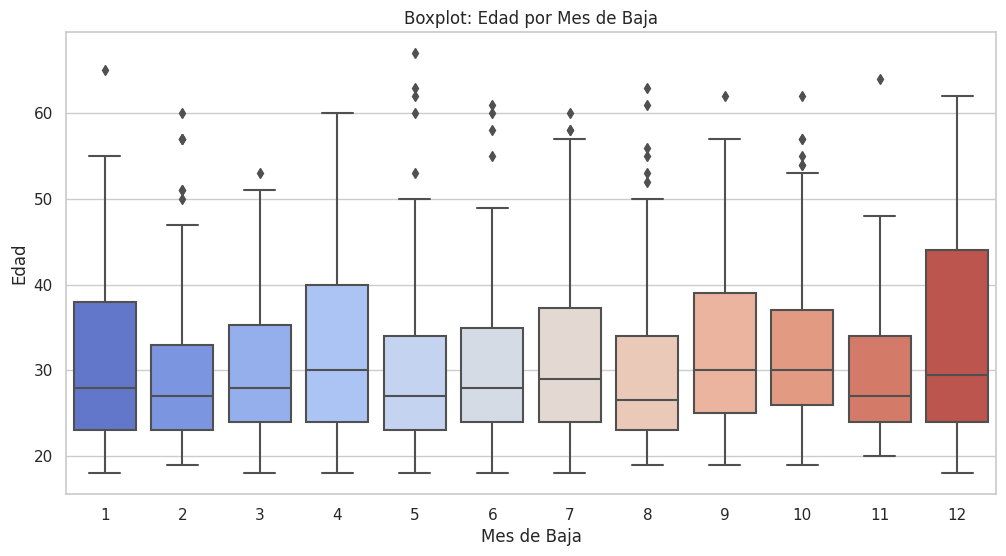

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mes_Baja', y='Edad', data=df, palette='coolwarm')
plt.title('Boxplot: Edad por Mes de Baja')
plt.xlabel('Mes de Baja')
plt.ylabel('Edad')
plt.show()

**El gráfico de caja revela que la edad de quienes se dieron de baja en diferentes meses, mostrando variabilidad en la distribución, resaltando particularidades en ciertos meses.**

## Lugar de Nacimiento
**¿Cual son los 10 primeros lugares de nacimiento de las personas?**

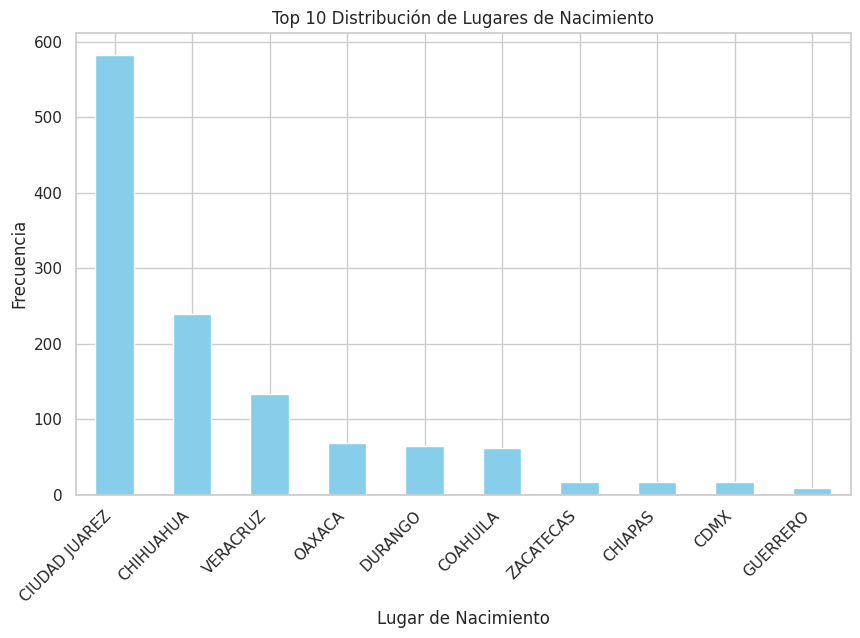

In [34]:
lugares_count = df['Lugar_Nacimiento'].value_counts().head(10)

plt.figure(figsize=(10, 6))
lugares_count.plot(kind='bar',color='skyblue')
plt.title('Top 10 Distribución de Lugares de Nacimiento')
plt.xlabel('Lugar de Nacimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45,ha='right')
plt.show()

**De acuerdo al top 10 de los lugares de nacimento hay un mayor numero de personas que nacieron en CIudad Juares**

## Nacionalidad
**¿Cual es la distribucion de nacinalidades en los datos?**

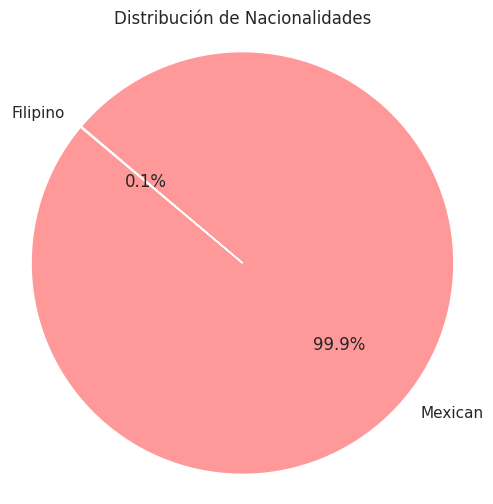

In [35]:
count = df['Nacionalidad'].value_counts()
colores = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Distribución de Nacionalidades')
plt.axis('equal')
plt.show()

**La predominancia de la nacionalidad mexicana es evidente en la distribución, destacando la presencia singular de un filipino en la muestra.**

## Estado Civil

**¿Cual Estado Civil predenomina mas en los datos?**

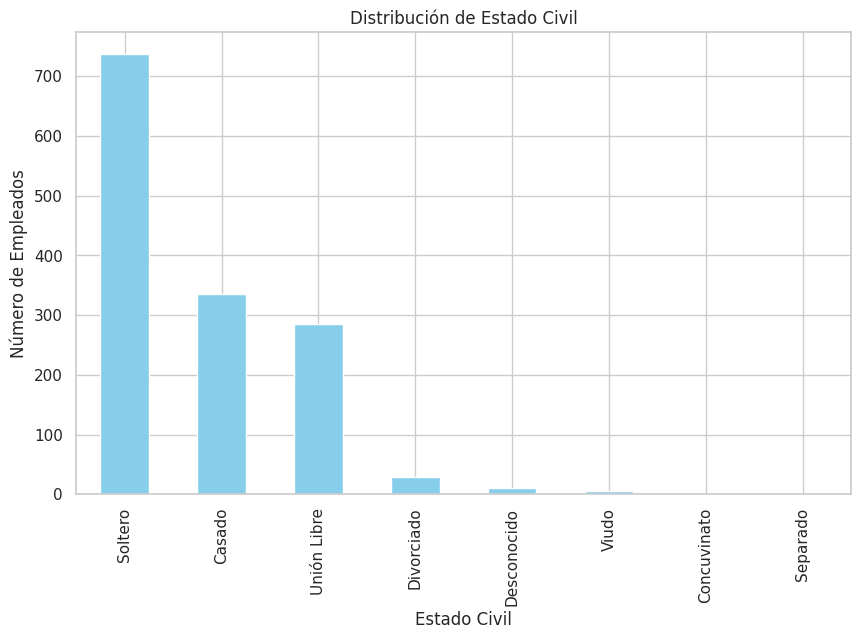

In [36]:
df['Estado_Civil'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribución de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Empleados')
plt.show()

**La mayoria de las personas que estan en los datos tienen un estado civil de Soltero**

## Nivel Salarial

**¿Cuales son los tipos de Salarios que existen?**

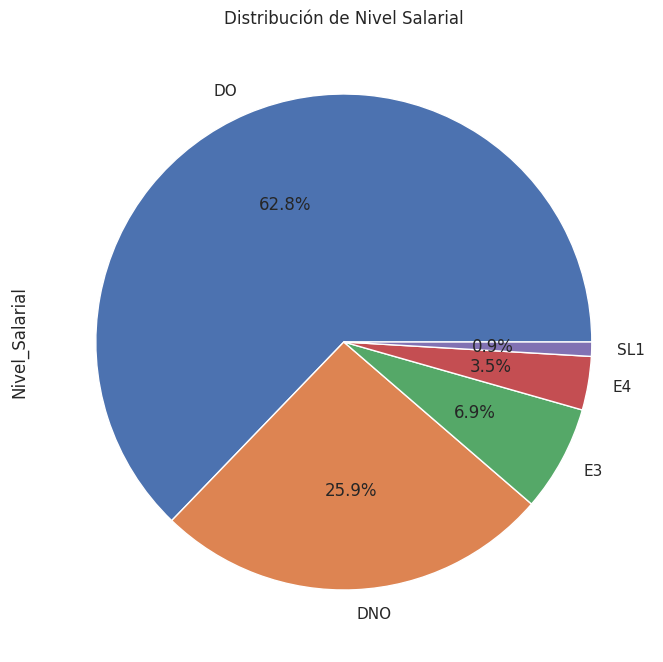

In [37]:
df['Nivel_Salarial'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 12))
plt.title('Distribución de Nivel Salarial')
plt.show()

* DO: Director de Operaciones
* DNO: Director de Operaciones No Tripulante
* E3: Empleado Nivel 3
* E4: Empleado Nivel 4
* SL1: Nivel 1 de Servicio

## Numero de Hijos por Edad

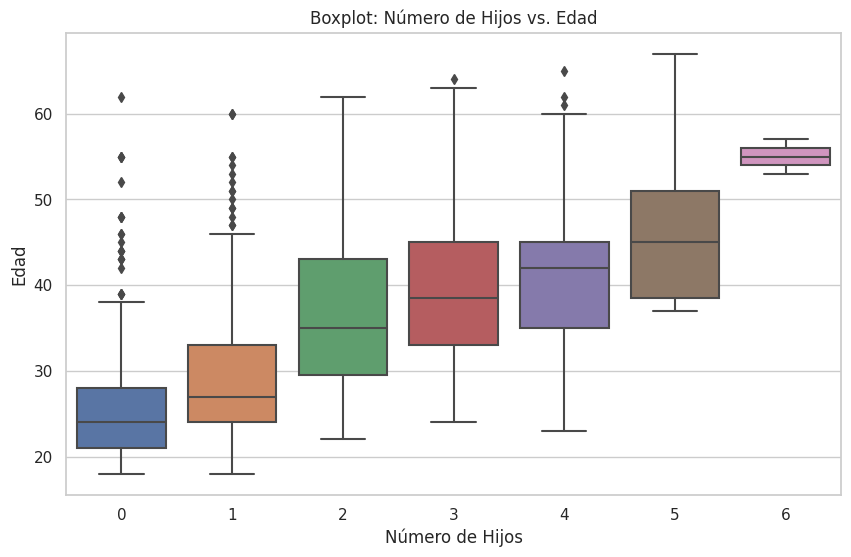

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Numero_Hijos', y='Edad', data=df)
plt.title('Boxplot: Número de Hijos vs. Edad')
plt.xlabel('Número de Hijos')
plt.ylabel('Edad')
plt.show()


**El diagrama muestra que la mayoría de las personas tienen de 0 a 2 hijos, y que el número de hijos disminuye a medida que aumenta la edad.**



La mitad de las personas en el estudio tienen 1 o menos hijos, y la mitad tiene 2 o más hijos.

El 50% de las personas en el estudio tienen un número de hijos que se encuentra dentro de un rango de 2.
Los puntos fuera de los bigotes representan los valores atípicos, que son datos que se encuentran muy por encima o por debajo del resto de la distribución.

El número de hijos es relativamente bajo en las personas más jóvenes y aumenta a medida que las personas envejecen. Sin embargo, la mayoría de las personas tienen de 0 a 2 hijos, independientemente de su edad.

## Motivo renuncia
**¿Cuáles son las razones principales por las que renuncian?**

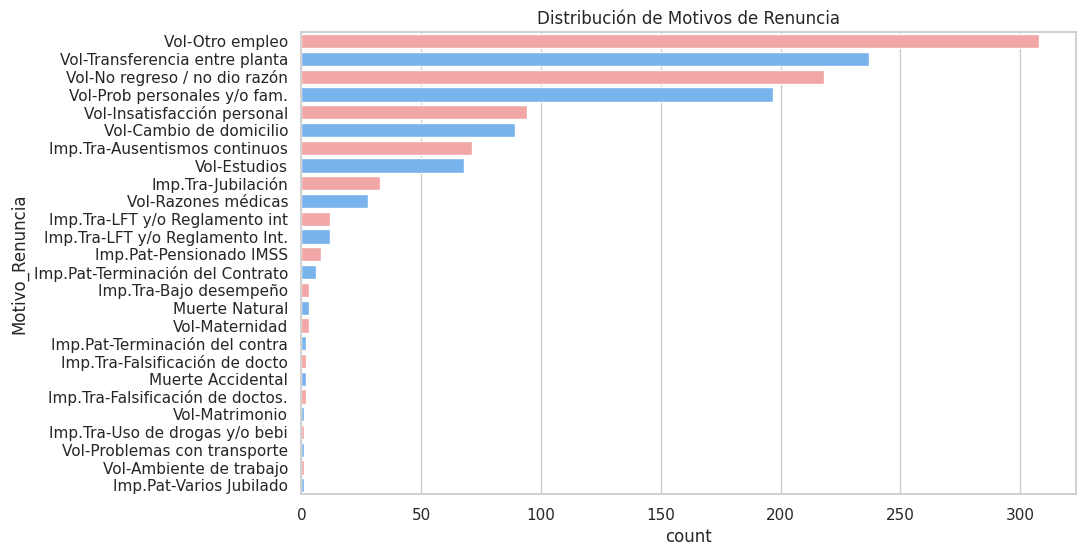

In [39]:
m_counts = df['Motivo_Renuncia'].value_counts()
colores = ['#ff9999', '#66b3ff']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Utilizamos countplot de Seaborn con el eje y
ax = sns.countplot(y='Motivo_Renuncia', data=df, palette=colores, order=m_counts.index)

plt.title('Distribución de Motivos de Renuncia')
plt.show()

**El grafico nos muestra que el principal motivo por los que renuncia una persona son porque encontraron un mejor empleo.**

### Motivo renuncia por Area
**¿Que area liquida mas personal?**

<Figure size 1200x800 with 0 Axes>

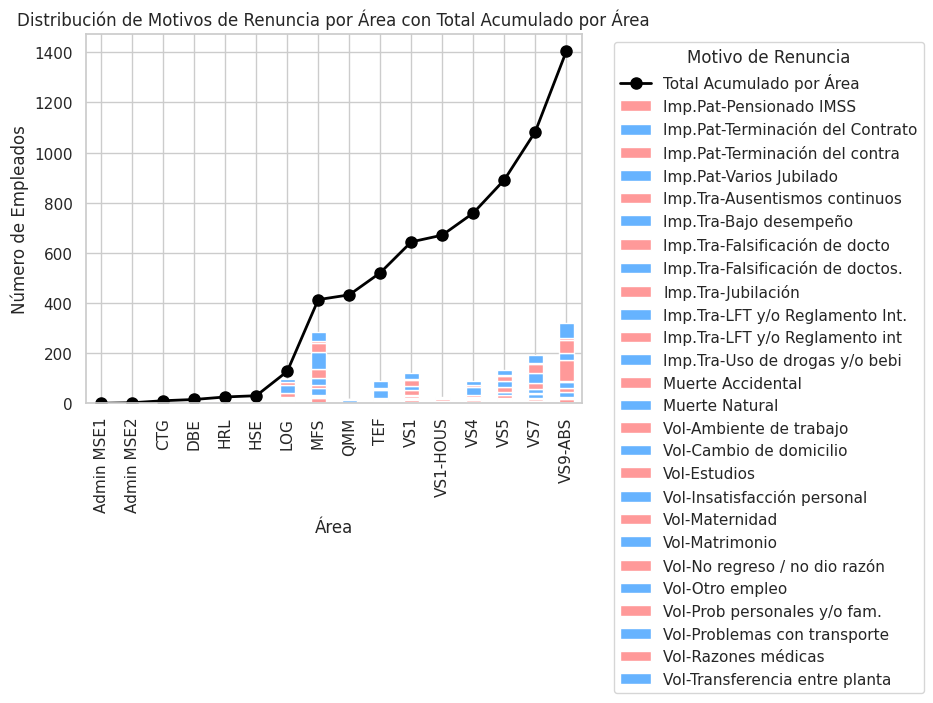

In [40]:
# Crear una tabla de contingencia
motivos_por_area = df.groupby(['Area', 'Motivo_Renuncia']).size().unstack()

# Calcular el total de renuncias por área
total_por_area = df.groupby('Area').size().cumsum()

colores = ['#ff9999', '#66b3ff']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Utilizamos barplot de Seaborn para un gráfico de barras apiladas
motivos_por_area.plot(kind='bar', stacked=True, color=colores)

# Agregamos una línea que representa el total acumulado de renuncias por área
plt.plot(total_por_area.index, total_por_area.values, color='black', marker='o', linestyle='-', linewidth=2, markersize=8, label='Total Acumulado por Área')

plt.title('Distribución de Motivos de Renuncia por Área con Total Acumulado por Área')
plt.xlabel('Área')
plt.ylabel('Número de Empleados')

plt.legend(title='Motivo de Renuncia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**¿Cual es la distribucion de nacinalidades en los datos?**


### Motivo de Renuncia por Genero

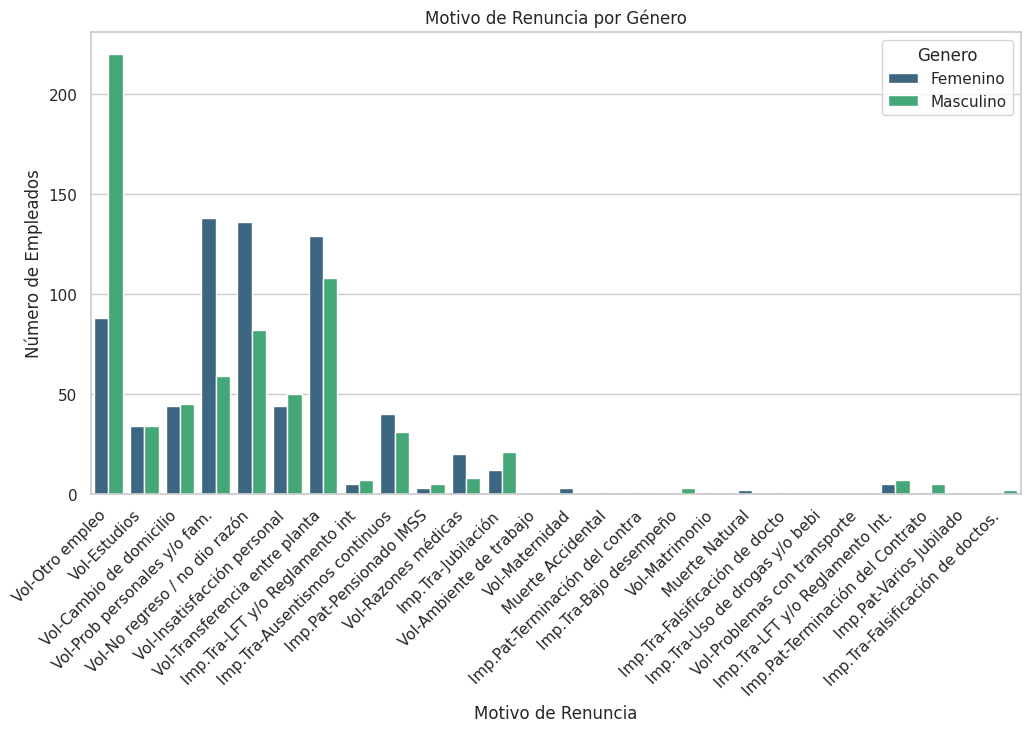

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Motivo_Renuncia', hue='Genero', data=df, palette='viridis')
plt.title('Motivo de Renuncia por Género')
plt.xlabel('Motivo de Renuncia')
plt.ylabel('Número de Empleados')
plt.xticks(rotation=45, ha='right')
plt.show()

**El diagrama revela que, para los hombres, la razón principal de salida es la búsqueda de mejores empleos, mientras que para las mujeres, los motivos se inclinan hacia problemas personales y familiares.**




### Motivo de Renuncia por Lugar de Nacimiento

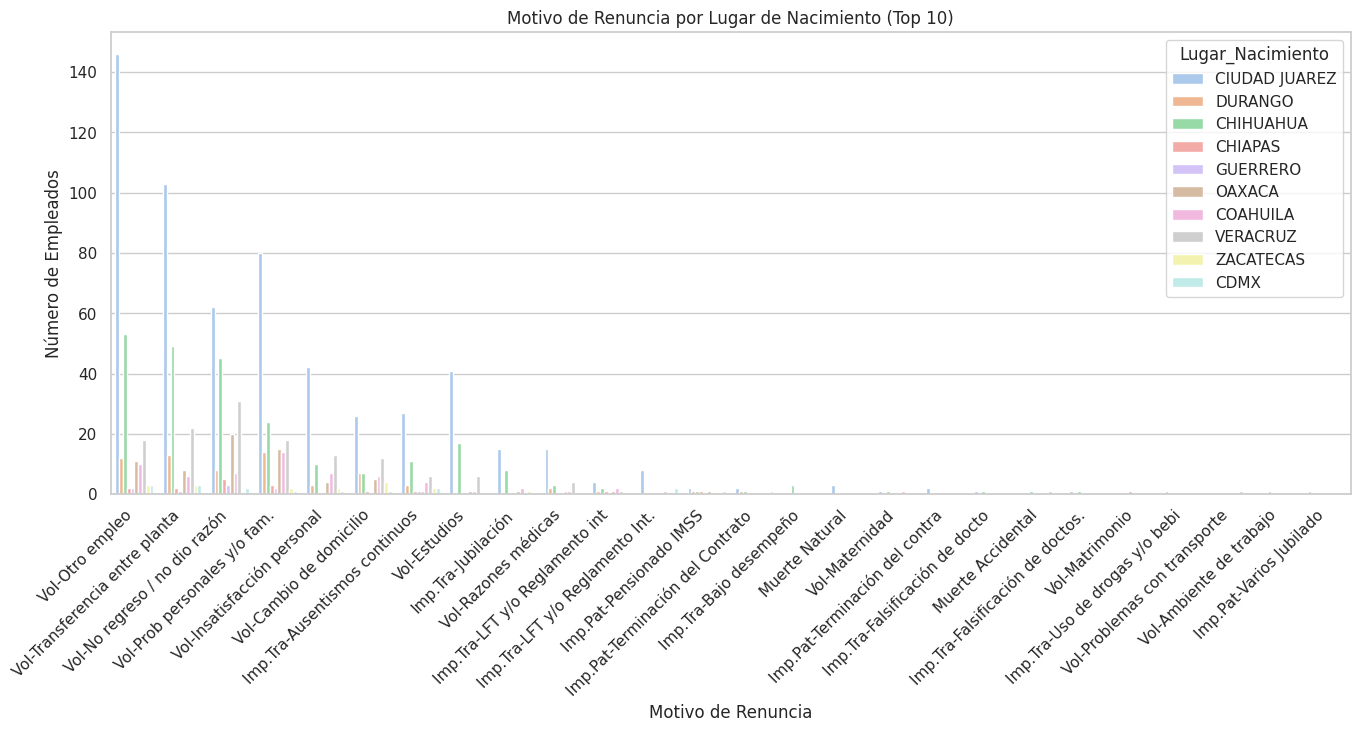

In [42]:
top_10_lugares = df['Lugar_Nacimiento'].value_counts().head(10).index
df_top_10 = df[df['Lugar_Nacimiento'].isin(top_10_lugares)]

plt.figure(figsize=(16, 6))
sns.countplot(x='Motivo_Renuncia', hue='Lugar_Nacimiento', data=df_top_10,
              palette='pastel',order=df['Motivo_Renuncia'].value_counts().index)
plt.title('Motivo de Renuncia por Lugar de Nacimiento (Top 10)')
plt.xlabel('Motivo de Renuncia')
plt.ylabel('Número de Empleados')
plt.xticks(rotation=45, ha='right')
plt.savefig('LugarOrigen.pdf')
plt.show()

**El diagrama resalta que Ciudad Juárez tiene la mayor proporción de renuncias, mientras que aquellos nacidos fuera muestran mayor retención en la organización.**





### Motivo Renuncia por Estado Civil

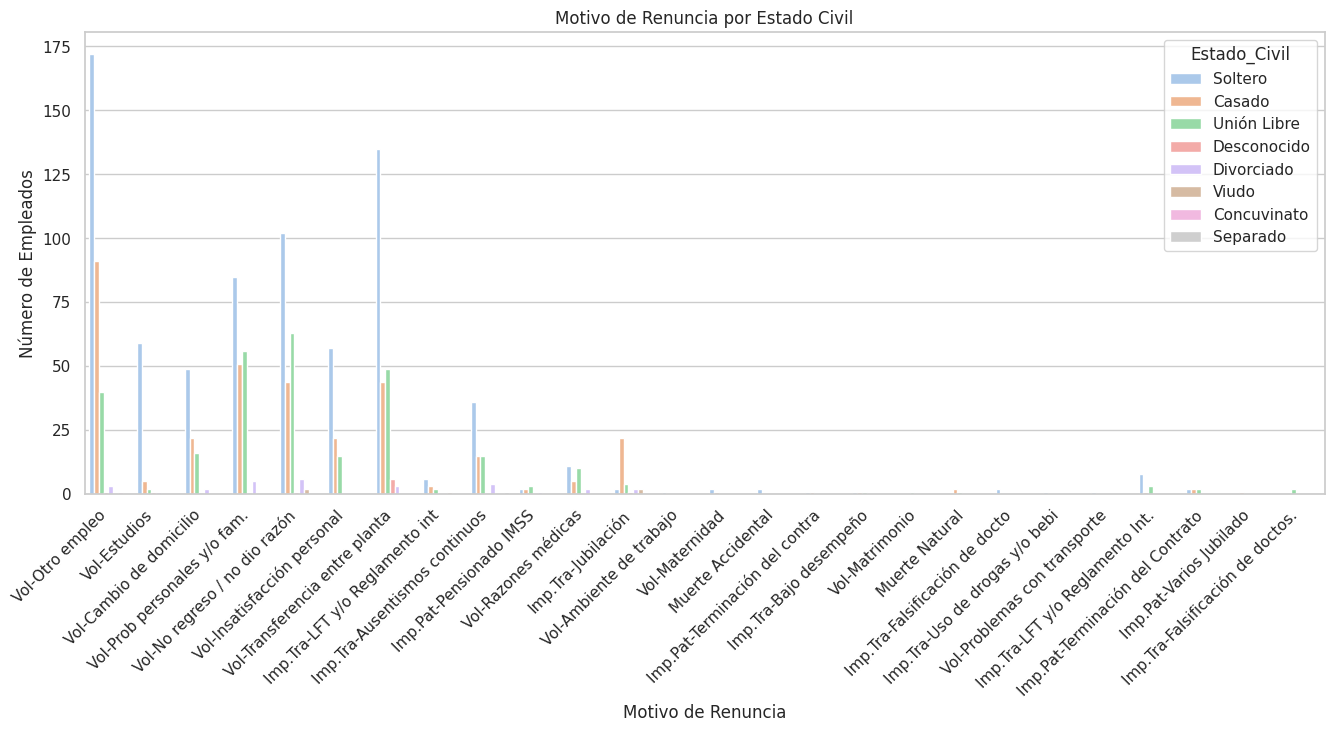

In [43]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Motivo_Renuncia', hue='Estado_Civil', data=df, palette='pastel')
plt.title('Motivo de Renuncia por Estado Civil')
plt.xlabel('Motivo de Renuncia')
plt.ylabel('Número de Empleados')
plt.xticks(rotation=45, ha='right')
plt.show()


**La alta frecuencia de renuncias entre individuos solteros sugiere la posibilidad de que la falta de responsabilidades familiares, como hijos, sea un factor influyente en esta decisión.**

### Motivo de Renuncia por Nivel Salarial

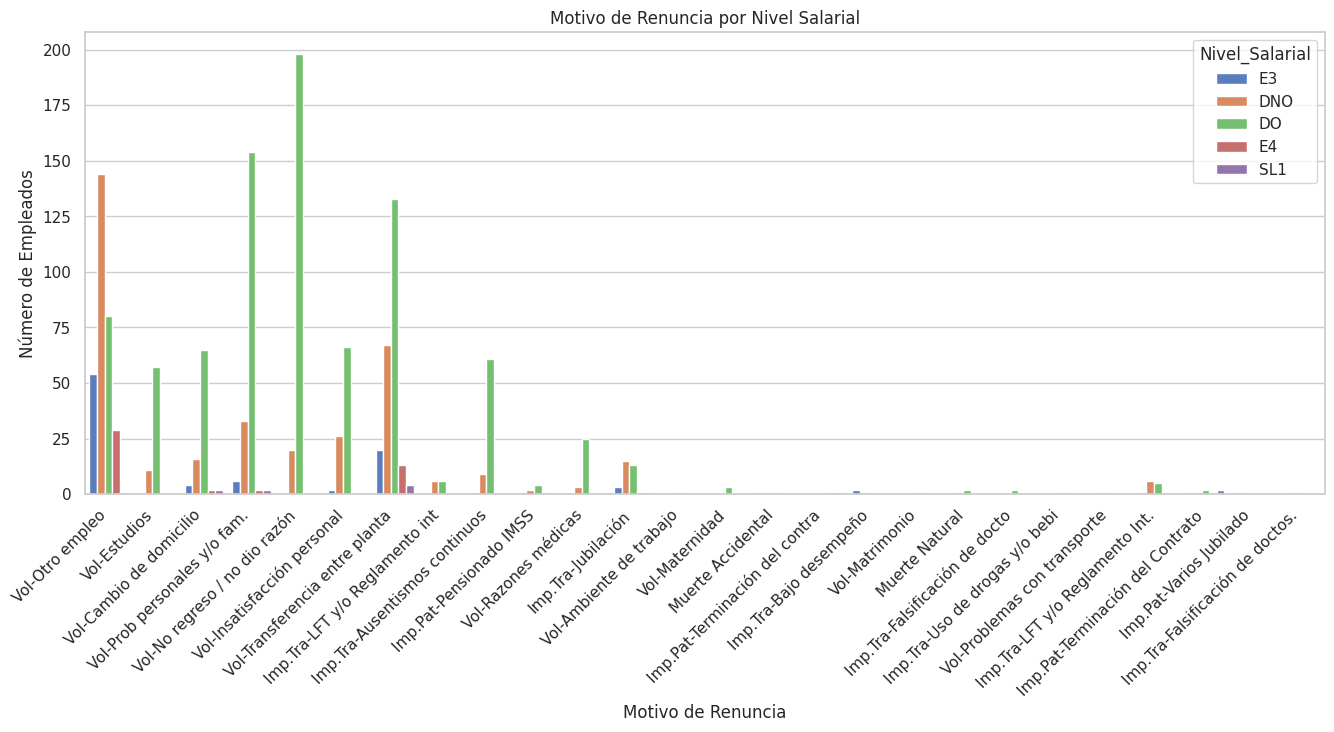

In [44]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Motivo_Renuncia', hue='Nivel_Salarial', data=df, palette='muted')
plt.title('Motivo de Renuncia por Nivel Salarial')
plt.xlabel('Motivo de Renuncia')
plt.ylabel('Número de Empleados')
plt.xticks(rotation=45, ha='right')
plt.show()


* DO: Director de Operaciones
* DNO: Director de Operaciones No Tripulante
* E3: Empleado Nivel 3
* E4: Empleado Nivel 4
* SL1: Nivel 1 de Servicio

**La retención de empleados parece estar fuertemente vinculada al nivel salarial, sugiriendo su importancia como variable crucial en la retención laboral.**

### Motivo de renuncia por año

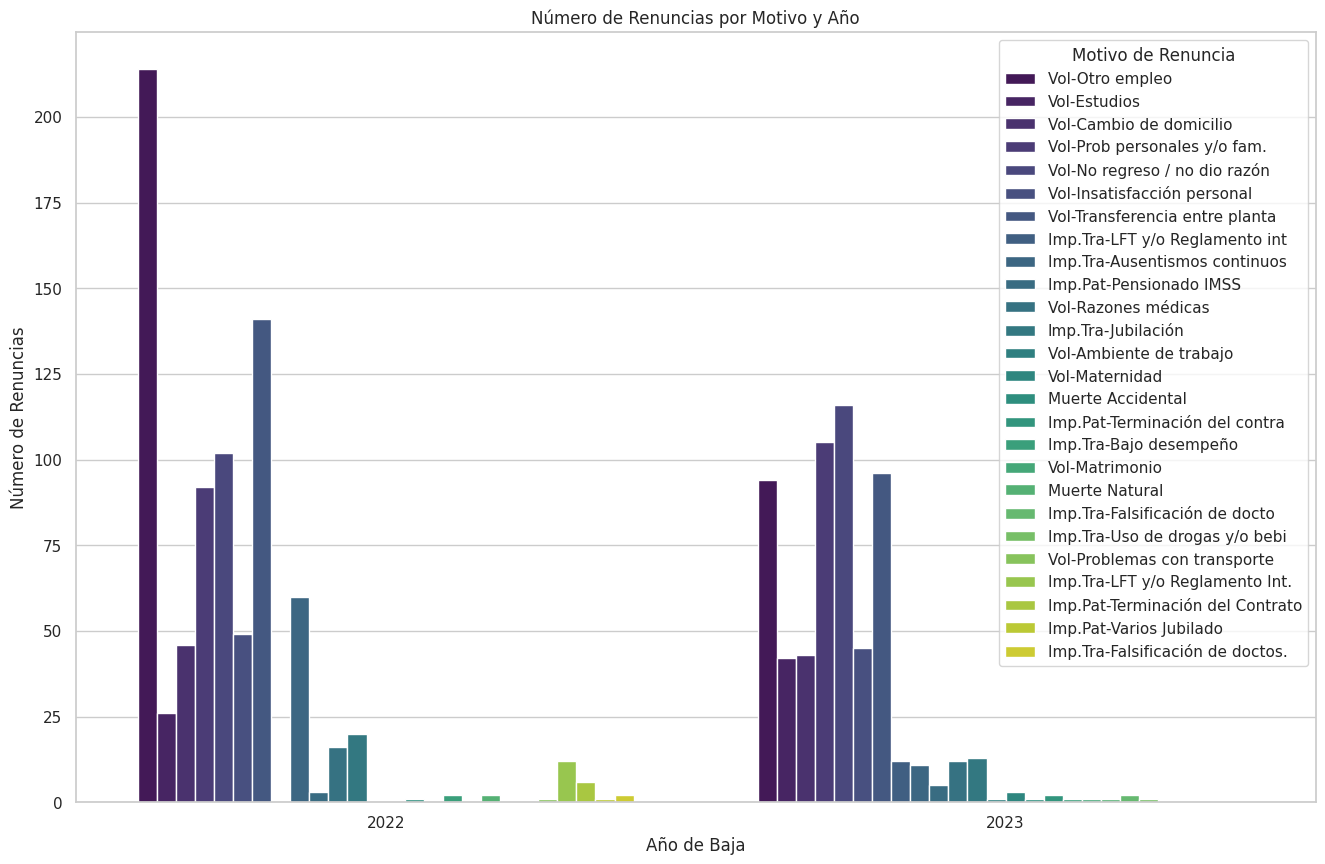

In [45]:
plt.figure(figsize=(16, 10))
sns.countplot(x='Año_Baja', hue='Motivo_Renuncia', data=df, palette='viridis')
plt.title('Número de Renuncias por Motivo y Año')
plt.xlabel('Año de Baja')
plt.ylabel('Número de Renuncias')
plt.legend(title='Motivo de Renuncia', loc='upper right')
plt.show()

In [46]:
df.to_csv('clean_data.csv',index=False)